In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from skimage import io
import time

from sklearn.cluster import KMeans as KMeans_

In [2]:
from google.colab import files
files.upload()

Saving Mall.csv to Mall.csv


{'Mall.csv': b'CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)\r\n0001,Male,19,15,39\r\n0002,Male,21,15,81\r\n0003,Female,20,16,6\r\n0004,Female,23,16,77\r\n0005,Female,31,17,40\r\n0006,Female,22,17,76\r\n0007,Female,35,18,6\r\n0008,Female,23,18,94\r\n0009,Male,64,19,3\r\n0010,Female,30,19,72\r\n0011,Male,67,19,14\r\n0012,Female,35,19,99\r\n0013,Female,58,20,15\r\n0014,Female,24,20,77\r\n0015,Male,37,20,13\r\n0016,Male,22,20,79\r\n0017,Female,35,21,35\r\n0018,Male,20,21,66\r\n0019,Male,52,23,29\r\n0020,Female,35,23,98\r\n0021,Male,35,24,35\r\n0022,Male,25,24,73\r\n0023,Female,46,25,5\r\n0024,Male,31,25,73\r\n0025,Female,54,28,14\r\n0026,Male,29,28,82\r\n0027,Female,45,28,32\r\n0028,Male,35,28,61\r\n0029,Female,40,29,31\r\n0030,Female,23,29,87\r\n0031,Male,60,30,4\r\n0032,Female,21,30,73\r\n0033,Male,53,33,4\r\n0034,Male,18,33,92\r\n0035,Female,49,33,14\r\n0036,Female,21,33,81\r\n0037,Female,42,34,17\r\n0038,Female,30,34,73\r\n0039,Female,36,37,26\r\n0040,Female,20,37,75\

In [3]:
df = pd.read_csv('Mall.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df['Genre'] = df['Genre'].apply({'Male':0, 'Female':1}.get)
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [26]:
X = df.iloc[:,3 :]
X 

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Text(0, 0.5, 'Spending Score (1-100)')

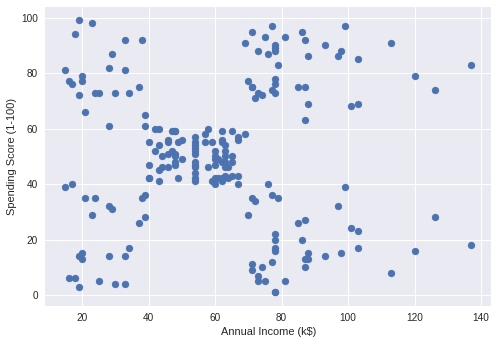

In [27]:
plt.close()
plt.style.use('seaborn')
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

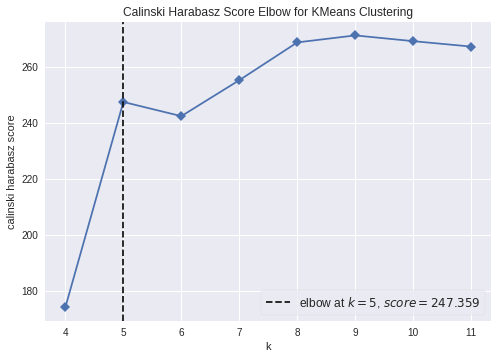

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='calinski_harabasz', timings=False
)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [17]:
kmeans=KMeans(n_clusters= 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)



In [28]:
x = X.values

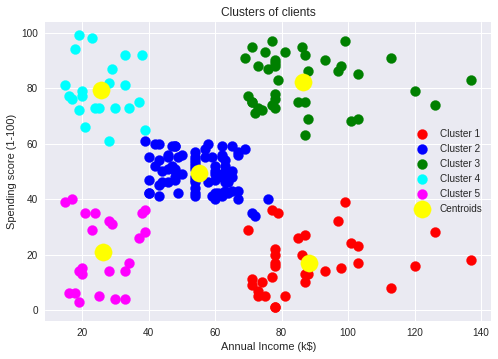

In [30]:
plt.scatter(x[y_kmeans==0][:,0],x[y_kmeans==0][:,1],s = 100, c='red', label = 'Cluster 1')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,1],s = 100, c='blue', label = 'Cluster 2')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1],s = 100, c='green', label = 'Cluster 3')

plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3,1],s = 100, c='cyan', label = 'Cluster 4')

plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4,1],s = 100, c='magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
    
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()